# FCC-DAWP
## Assignment 3: Medical Data Analyzer

#### Unaltered starter code

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1
df = None

# 2
df['overweight'] = None

# 3


# 4
def draw_cat_plot():
    # 5
    df_cat = None


    # 6
    df_cat = None
    

    # 7



    # 8
    fig = None


    # 9
    fig.savefig('catplot.png')
    return fig


# 10
def draw_heat_map():
    # 11
    df_heat = None

    # 12
    corr = None

    # 13
    mask = None



    # 14
    fig, ax = None

    # 15



    # 16
    fig.savefig('heatmap.png')
    return fig

### Submission 
(Paste successful code here; save as `medical_data_visualizer.py` for submission)

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1 Import the data from medical_examination.csv and assign it to the df variable
df = pd.read_csv("https://github.com/freeCodeCamp/boilerplate-medical-data-visualizer/raw/main/medical_examination.csv")

# 2 Create the overweight column in the df variable
# To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. 
# Use the value 0 for NOT overweight and the value 1 for overweight.
df['overweight'] = ((df['weight'] / (df['height'] / 100) ** 2) > 25).astype(int)

# 3 Normalize data by making 0 always good and 1 always bad. 
#If the value of cholesterol or gluc is 1, set the value to 0. If the value is more than 1, set the value to 1.
df['cholesterol'] = np.where(df['cholesterol'] > 1, 1, np.where(df['cholesterol'] == 1, 0, df['cholesterol']))
df['gluc'] = np.where(df['gluc'] == 1, 0, np.where(df['gluc'] > 1, 1, df['gluc']))

# 4 Draw the Categorical Plot in the draw_cat_plot function
# Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot(). 
# The dataset should be split by Cardio so there is one chart for each cardio value. 
# The chart should look like examples/Figure_1.png. (https://github.com/freeCodeCamp/boilerplate-medical-data-visualizer/blob/main/examples/Figure_1.png)
def draw_cat_plot():
    # 5 Create a DataFrame for the cat plot using pd.melt with values from cholesterol, gluc, smoke, alco, active, and overweight in the df_cat variable.
    # &
    # 6 Group and reformat the data in df_cat to split it by cardio. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
    df_cat =  pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'], 
                    var_name='variable', value_name='value')
    

    # 7 Convert the data into long format and create a chart that shows the value counts of the categorical features using the following method provided by the seaborn library import : sns.catplot()
    g = sns.catplot(x='variable', hue='value', col='cardio', data=df_cat, kind='count', col_order=[0, 1], col_wrap=2, height=5, aspect=1.5)

    # 8 Get the figure for the output and store it in the fig variable
    fig = g.fig


    # 9 Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig


# 10 Draw the Heat Map in the draw_heat_map function
# Create a correlation matrix using the dataset. 
# Plot the correlation matrix using seaborn's heatmap(). 
# Mask the upper triangle. The chart should look like examples/Figure_2.png. (https://github.com/freeCodeCamp/boilerplate-medical-data-visualizer/blob/main/examples/Figure_2.png)
def draw_heat_map():

# 11 Clean the data in the df_heat variable by filtering out the following patient segments that represent incorrect data:
    # A. height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
    # B. height is more than the 97.5th percentile
    # C. weight is less than the 2.5th percentile
    # D. weight is more than the 97.5th percentile
    df_heat = df[(df['weight'] >= df['weight'].quantile(0.025)) & (df['weight'] <= df['weight'].quantile(0.975)) & (df['height'] >= df['height'].quantile(0.025)) & (df['height'] <= df['height'].quantile(0.975))]

    # 12 Calculate the correlation matrix and store it in the corr variable
    corr = df_heat.corr()

    # 13 Generate a mask for the upper triangle and store it in the mask variable
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # 14 Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(8, 6))  

    # 15 Plot the correlation matrix using the method provided by the seaborn library import: sns.heatmap()
    sns.heatmap(corr, annot=True, cmap='coolwarm', mask=mask, fmt='.2f', ax=ax, vmin=-1, vmax=1)

    # 16 Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig

### Test/Working Area

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1 Import the data from medical_examination.csv and assign it to the df variable
df = pd.read_csv("https://github.com/freeCodeCamp/boilerplate-medical-data-visualizer/raw/main/medical_examination.csv")

In [2]:
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [4]:
# 2 Create the overweight column in the df variable
# To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. 
# If that value is > 25 then the person is overweight. 
# Use the value 0 for NOT overweight and the value 1 for overweight.

df['overweight'] = ((df['weight'] / (df['height'] / 100) ** 2) > 25).astype(int)

In [5]:
df.describe()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349843,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,0.622086
std,28851.302323,2467.251667,0.477253,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,0.484870
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,99999.000000,23713.000000,3.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# 3 Normalize data by making 0 always good and 1 always bad. 
# If the value of cholesterol or gluc is 1, set the value to 0. If the value is more than 1, set the value to 1.
df['cholesterol'] = np.where(df['cholesterol'] > 1, 1, np.where(df['cholesterol'] == 1, 0, df['cholesterol']))
df['gluc'] = np.where(df['gluc'] == 1, 0, np.where(df['gluc'] > 1, 1, df['gluc']))

In [7]:
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [8]:
df.describe()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349843,164.359229,74.205690,128.817286,96.630414,0.251643,0.150300,0.088129,0.053771,0.803729,0.499700,0.622086
std,28851.302323,2467.251667,0.477253,8.210126,14.395757,154.011419,188.472530,0.433960,0.357368,0.283484,0.225568,0.397179,0.500003,0.484870
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,99999.000000,23713.000000,3.000000,250.000000,200.000000,16020.000000,11000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
# 4 Draw the Categorical Plot in the draw_cat_plot function
# Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot(). 
# The dataset should be split by Cardio so there is one chart for each cardio value. 
# The chart should look like examples/Figure_1.png. (https://github.com/freeCodeCamp/boilerplate-medical-data-visualizer/blob/main/examples/Figure_1.png)

def draw_cat_plot():
    # 5 Create a DataFrame for the cat plot using pd.melt with values from cholesterol, gluc, smoke, alco, active, and overweight in the df_cat variable.
    # 6 Group and reformat the data in df_cat to split it by cardio. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
    df_cat =  pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'], 
                    var_name='variable', value_name='value')
    

    # 7 Convert the data into long format and create a chart that shows the value counts of the categorical features using the following method provided by the seaborn library import : sns.catplot()
    g = sns.catplot(x='variable', hue='value', col='cardio', data=df_cat, kind='count', col_order=[0, 1], col_wrap=2, height=5, aspect=1.5)

    # 8 Get the figure for the output and store it in the fig variable
    fig = g.fig


    # 9 Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig

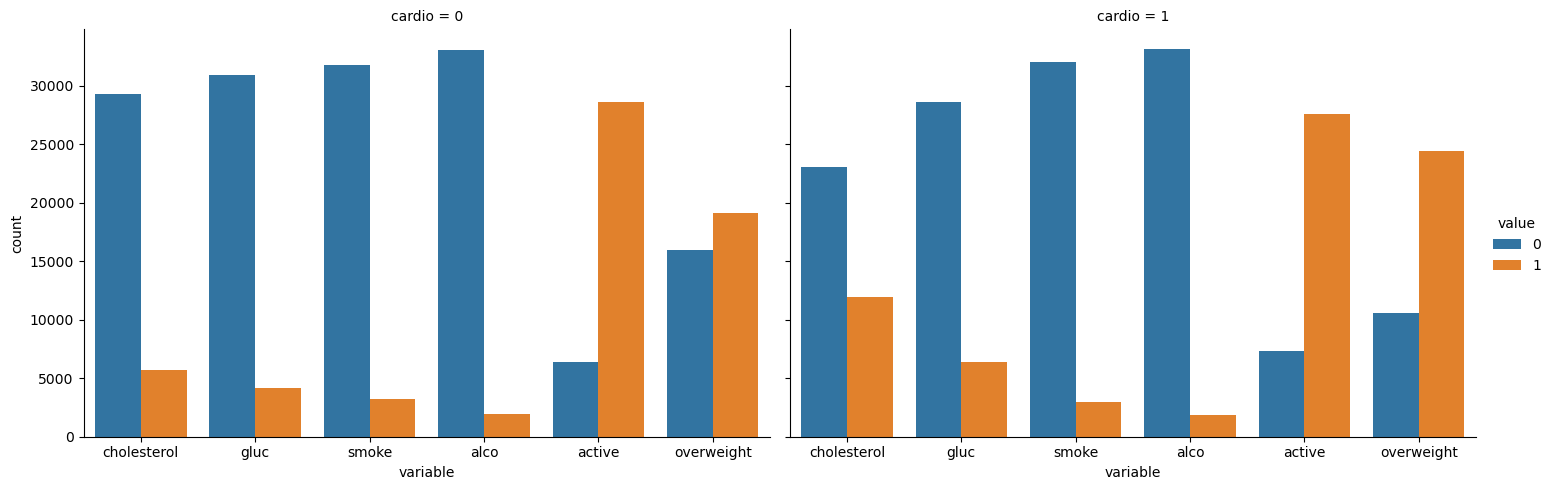

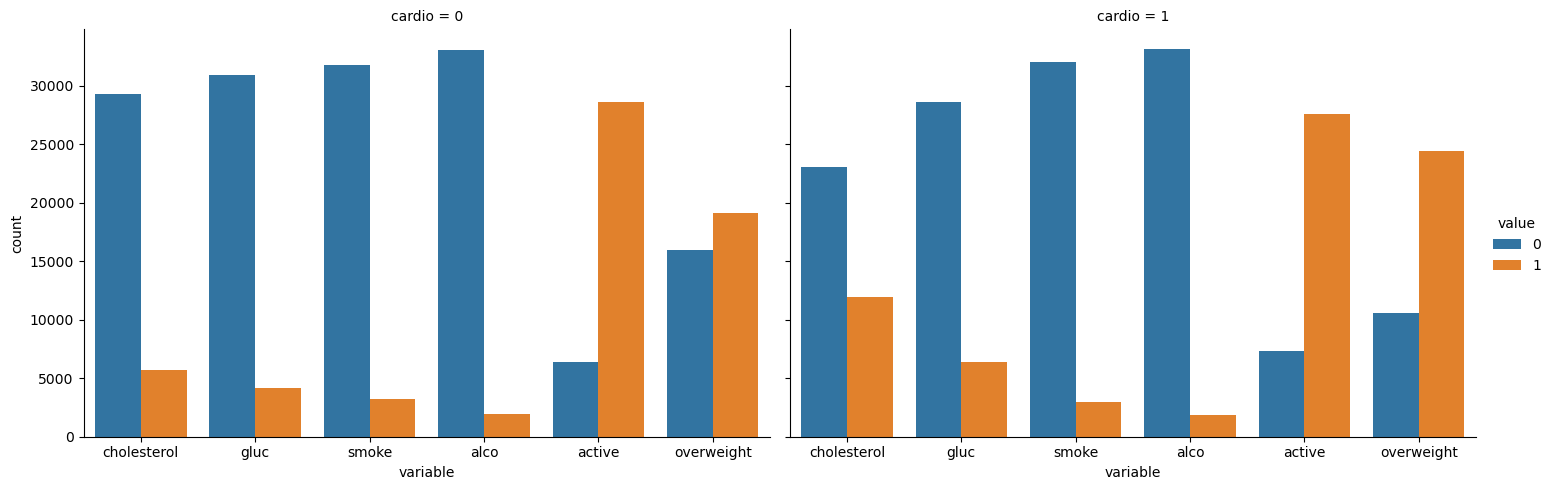

In [18]:
draw_cat_plot()

In [28]:
# 10 Draw the Heat Map in the draw_heat_map function
# Create a correlation matrix using the dataset. 
# Plot the correlation matrix using seaborn's heatmap(). 
# Mask the upper triangle. The chart should look like examples/Figure_2.png. (https://github.com/freeCodeCamp/boilerplate-medical-data-visualizer/blob/main/examples/Figure_2.png)
def draw_heat_map():

# 11 Clean the data in the df_heat variable by filtering out the following patient segments that represent incorrect data:
    # A. height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
    # B. height is more than the 97.5th percentile
    # C. weight is less than the 2.5th percentile
    # D. weight is more than the 97.5th percentile
    df_heat = df[(df['weight'] >= df['weight'].quantile(0.025)) & (df['weight'] <= df['weight'].quantile(0.975)) & (df['height'] >= df['height'].quantile(0.025)) & (df['height'] <= df['height'].quantile(0.975))]

    # 12 Calculate the correlation matrix and store it in the corr variable
    corr = df_heat.corr()

    # 13 Generate a mask for the upper triangle and store it in the mask variable
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # 14 Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(8, 6))  

    # 15 Plot the correlation matrix using the method provided by the seaborn library import: sns.heatmap()
    sns.heatmap(corr, annot=True, cmap='coolwarm', mask=mask, fmt='.2f', ax=ax, vmin=-1, vmax=1)

    # 16 Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig

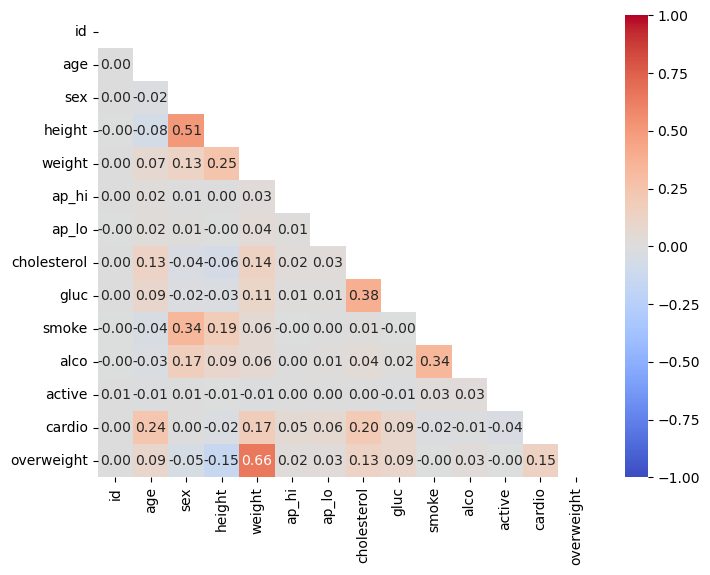

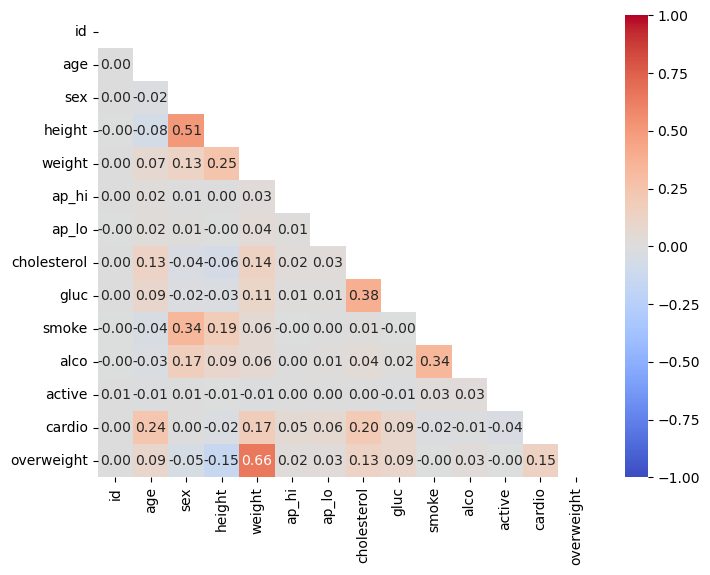

In [29]:
draw_heat_map()